# Formula 1 - What Wins Races?

### About the Dataset



In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

# cicuits.csv

In [37]:
df = pd.read_csv("circuits.csv")
df.head()


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [38]:
df.columns


Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

In [39]:
df.isnull().sum()

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

# constructors

In [40]:
df = pd.read_csv("constructors.csv")
df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [41]:
df.isnull().sum()

constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

# drivers

In [43]:
df = pd.read_csv("drivers.csv")
df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [45]:
df.isnull().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

# qualifying

In [47]:
df = pd.read_csv("qualifying.csv")
df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [48]:
df.isnull().sum()

qualifyId         0
raceId            0
driverId          0
constructorId     0
number            0
position          0
q1                0
q2               22
q3               46
dtype: int64

In [51]:
df['q2'] = df['q2'].fillna("Unknown")
df['q3'] = df['q3'].fillna("Unknown")


In [52]:
df.isnull().sum()

qualifyId        0
raceId           0
driverId         0
constructorId    0
number           0
position         0
q1               0
q2               0
q3               0
dtype: int64

# races

In [55]:
df = pd.read_csv("races.csv")
df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [56]:
df.isnull().sum()   

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

# results

In [59]:
df = pd.read_csv("results.csv")
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [60]:
df.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

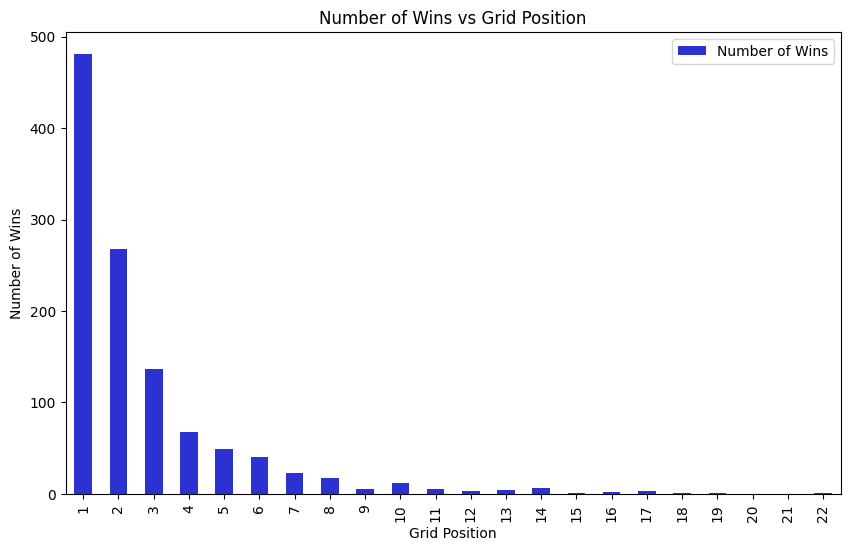

In [71]:
# Count wins by grid position
gridPos_vs_winning = df.groupby('grid')['positionOrder'].apply(lambda x: (x == 1).sum()).reset_index()
gridPos_vs_winning.columns = ['Grid Position', 'Number of Wins']
# Keep only possible grid positions (1 through 22)
gridPos_vs_winning = gridPos_vs_winning[gridPos_vs_winning['Grid Position'].between(1, 22)]
gridPos_vs_winning = gridPos_vs_winning.sort_values('Grid Position')
# Plot
gridPos_vs_winning.plot(x='Grid Position', y='Number of Wins', kind='bar', figsize=(10,6), color="#2C31D2")
plt.title('Number of Wins vs Grid Position')
plt.xlabel('Grid Position')
plt.ylabel('Number of Wins')
plt.show()

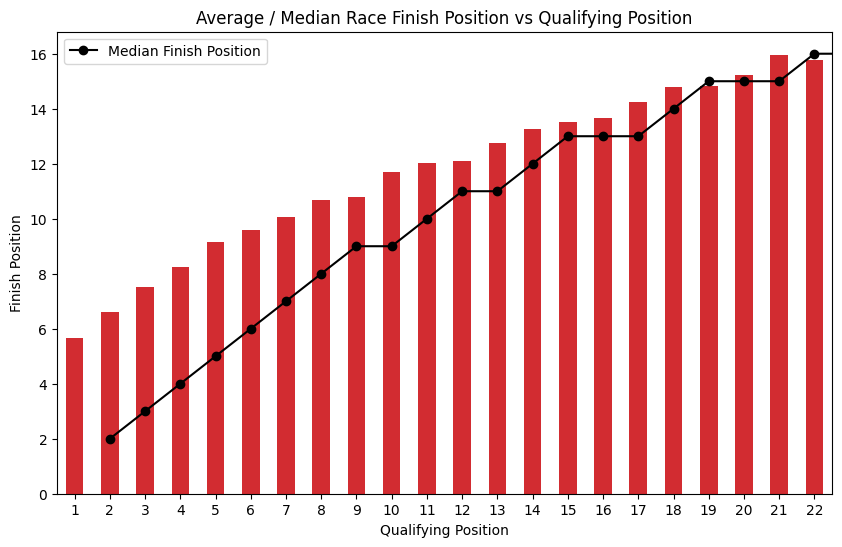

In [ ]:
# Qualifying Position vs Race Finish (average)
# Make numeric and drop non-finishers
df['grid'] = pd.to_numeric(df['grid'], errors='coerce')
df['positionOrder'] = pd.to_numeric(df['positionOrder'], errors='coerce')
results_clean = df.dropna(subset=['grid', 'positionOrder']).copy()

# Exclude impossible grid values and non-positive finish positions
results_clean = results_clean[results_clean['grid'].between(1, 22) & (results_clean['positionOrder'] > 0)]

# calculate mean and median finish position per qualifying spot
agg = results_clean.groupby('grid')['positionOrder'].agg(['mean', 'median']).reset_index()
agg.columns = ['Qualifying Position', 'Mean Finish Position', 'Median Finish Position']
agg = agg.sort_values('Qualifying Position')

# reindex to make sure positions 1-22 appear (missing -> NaN)
full_idx = pd.DataFrame({'Qualifying Position': range(1, 23)})
agg = full_idx.merge(agg, on='Qualifying Position', how='left')

# Plot mean (and median as a line)
ax = agg.plot(x='Qualifying Position', y='Mean Finish Position', kind='bar', figsize=(10,6), color="#D22C31", legend=False)
agg.plot(x='Qualifying Position', y='Median Finish Position', kind='line', marker='o', color='black', secondary_y=False, ax=ax)
plt.title('Average / Median Race Finish Position vs Qualifying Position')
plt.xlabel('Qualifying Position')
plt.ylabel('Finish Position')
plt.legend(['Median Finish Position'])
plt.show()

In [ ]:
# Do wins cluster around certain constructors? (plot top 10)
wins = df[df['positionOrder'] == 1].copy()
constructor_wins = wins.groupby('constructorId')['raceId'].count().reset_index(name='wins')

# Try to map constructorId to a readable name from constructors.csv
try:
    constructors_df = pd.read_csv('constructors.csv', usecols=['constructorId','name'])
except Exception:
    constructors_df = None

if constructors_df is not None:
    constructor_wins = constructor_wins.merge(constructors_df, on='constructorId', how='left')
    constructor_wins['label'] = constructor_wins['name'].fillna(constructor_wins['constructorId'].astype(str))
else:
    constructor_wins['label'] = constructor_wins['constructorId'].astype(str)

# Select top 10 and plot as horizontal bar chart for readability
top10 = constructor_wins.sort_values('wins', ascending=False).head(10).copy()
if top10.empty:
    print('No wins found (check that `df` contains results and `positionOrder` == 1).')
else:
    top10 = top10[::-1]  # reverse for plotting from top to bottom
    plt.figure(figsize=(10,6))
    plt.barh(top10['label'], top10['wins'], color="#2C31D2")
    plt.xlabel('Number of Wins')
    plt.title('Top 10 Constructors by Race Wins')
    plt.tight_layout()
    plt.show()

    constructorId  wins
5               6   249
0               1   185
31            131   129
6               9   122
2               3   114
14             32    45
3               4    35
9              22    27
12             25    23
15             34    23
